**Part B: Implementation part**

Epoch 1/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 177ms/step - accuracy: 0.2897 - loss: 2.0831 - val_accuracy: 0.4883 - val_loss: 1.4540
Epoch 2/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 171ms/step - accuracy: 0.4422 - loss: 1.5386 - val_accuracy: 0.5169 - val_loss: 1.4323
Epoch 3/3
782/782 ━━━━━━━━━━━━━━━━━━━━ 134s 170ms/step - accuracy: 0.4942 - loss: 1.4090 - val_accuracy: 0.4713 - val_loss: 1.7127
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.5152 - loss: 1.4349
Test Loss: 1.4323, Test Accuracy: 0.5169
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step


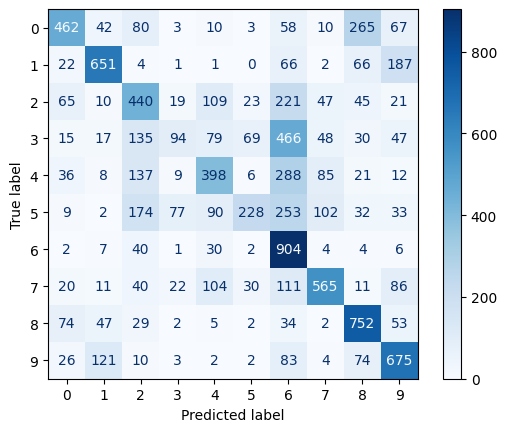

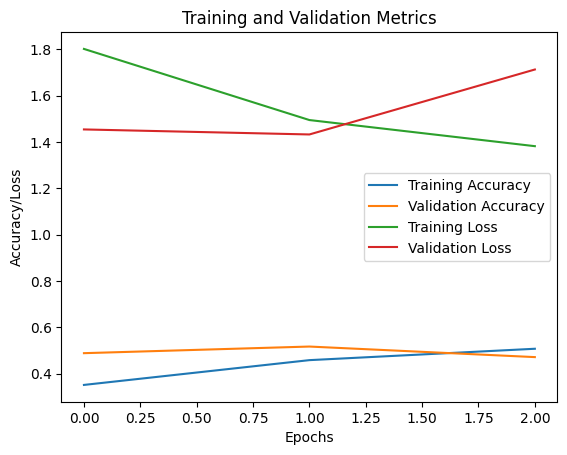

In [4]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Data Preprocessing
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Step 2: Model Design
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 3: Model Training
# Train the model for 3 epochs
history = model.fit(
    datagen.flow(X_train, y_train_one_hot, batch_size=64),
    validation_data=(X_test, y_test_one_hot),
    epochs=3,  # Set epochs to 3
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]  # Early stopping is included but may not trigger with only 3 epochs
)

# Step 4: Model Evaluation
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Generate predictions
y_pred = np.argmax(model.predict(X_test), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')
plt.show()

# Optional: Training and Validation Accuracy/Loss Curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Metrics')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.show()
